In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from imblearn.under_sampling import NearMiss
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xg
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import pickle 

In [2]:
df1 = pd.read_csv('./Weather dataset/final_merged.csv')
df1 = df1.drop(['Unnamed: 0'] , axis=1)

In [3]:
df1.columns

Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'FlightDate',
       'OriginAirportID', 'Origin', 'DestAirportID', 'Dest', 'CRSDepTime',
       'DepTime', 'DepDelayMinutes', 'DepDel15', 'CRSArrTime', 'ArrTime',
       'ArrDelayMinutes', 'ArrDel15', 'time', 'windspeedKmph', 'DewPointF',
       'cloudcover', 'precipMM', 'pressure', 'WindGustKmph', 'visibility',
       'weatherCode', 'tempF', 'WindChillF', 'winddirDegree', 'humidity',
       'date', 'airport'],
      dtype='object')

In [4]:
df1.shape

(1877296, 32)

In [5]:
df1.isnull().sum()

Year                   0
Quarter                0
Month                  0
DayofMonth             0
FlightDate             0
OriginAirportID        0
Origin                 0
DestAirportID          0
Dest                   0
CRSDepTime             0
DepTime            20980
DepDelayMinutes    20987
DepDel15           20987
CRSArrTime             0
ArrTime            22080
ArrDelayMinutes    25860
ArrDel15           25860
time                   0
windspeedKmph          0
DewPointF              0
cloudcover             0
precipMM               0
pressure               0
WindGustKmph           0
visibility             0
weatherCode            0
tempF                  0
WindChillF             0
winddirDegree          0
humidity               0
date                   0
airport                0
dtype: int64

In [6]:
df1=df1.dropna()

In [7]:
df1.shape

(1851436, 32)

In [8]:
df1 = df1.drop(['FlightDate','Origin','Dest','time','date','airport','ArrTime','ArrDel15','ArrDelayMinutes',
       'DepTime'],axis=1)

In [9]:
df1.isnull().sum()

Year               0
Quarter            0
Month              0
DayofMonth         0
OriginAirportID    0
DestAirportID      0
CRSDepTime         0
DepDelayMinutes    0
DepDel15           0
CRSArrTime         0
windspeedKmph      0
DewPointF          0
cloudcover         0
precipMM           0
pressure           0
WindGustKmph       0
visibility         0
weatherCode        0
tempF              0
WindChillF         0
winddirDegree      0
humidity           0
dtype: int64

In [10]:
cor= df1.corr() 
cor

,Year,Quarter,Month,DayofMonth,OriginAirportID,DestAirportID,CRSDepTime,DepDelayMinutes,DepDel15,CRSArrTime,...,cloudcover,precipMM,pressure,WindGustKmph,visibility,weatherCode,tempF,WindChillF,winddirDegree,humidity
Year,1.000000,-0.001637,-0.002259,0.000282,0.000417,0.000467,0.001652,0.003559,0.005343,0.000132,...,-0.090776,0.009011,-0.044014,0.040500,0.058149,-0.022875,-0.010559,0.004334,0.000652,-0.044481
Quarter,-0.001637,1.000000,0.970563,0.010774,0.003222,0.003261,-0.002041,-0.015958,-0.020260,-0.004034,...,-0.086989,-0.038045,0.037480,-0.093063,0.119824,-0.088188,0.153255,0.149327,-0.046110,-0.055307
Month,-0.002259,0.970563,1.000000,0.010626,0.003303,0.003313,-0.001571,-0.017639,-0.021118,-0.004775,...,-0.084364,-0.040742,0.042694,-0.090313,0.120989,-0.088740,0.142800,0.138441,-0.047460,-0.054493
DayofMonth,0.000282,0.010774,0.010626,1.000000,0.000392,0.000320,0.000285,-0.006648,-0.007052,-0.001930,...,-0.015740,-0.002263,-0.033245,0.006162,0.025409,-0.009805,0.016599,0.016145,0.001128,-0.001509
OriginAirportID,0.000417,0.003222,0.003303,0.000392,1.000000,-0.026566,-0.045762,0.006846,0.012226,-0.025247,...,0.074219,-0.029379,-0.057899,-0.047123,-0.020389,-0.026796,-0.050504,-0.046602,0.010839,0.099604
DestAirportID,0.000467,0.003261,0.003313,0.000320,-0.026566,1.000000,0.062883,0.016703,0.031402,0.010083,...,-0.013905,-0.010247,-0.028681,0.001860,0.014033,-0.018037,-0.029387,-0.028154,0.029198,-0.024454
CRSDepTime,0.001652,-0.002041,-0.001571,0.000285,-0.045762,0.062883,1.000000,0.104758,0.154992,0.487311,...,-0.059504,0.033394,-0.077750,0.116873,0.110844,0.012179,0.154128,0.154103,0.054804,-0.199771
DepDelayMinutes,0.003559,-0.015958,-0.017639,-0.006648,0.006846,0.016703,0.104758,1.000000,0.608084,0.086946,...,0.031201,0.081763,-0.052153,0.070939,-0.018663,0.079147,0.030272,0.027964,0.012528,0.003518
DepDel15,0.005343,-0.020260,-0.021118,-0.007052,0.012226,0.031402,0.154992,0.608084,1.000000,0.118576,...,0.029287,0.080590,-0.060166,0.072145,-0.012012,0.080379,0.036996,0.033870,0.022263,-0.006679
CRSArrTime,0.000132,-0.004034,-0.004775,-0.001930,-0.025247,0.010083,0.487311,0.086946,0.118576,1.000000,...,-0.033264,0.030831,-0.060223,0.090936,0.093813,0.014077,0.146131,0.135804,0.018510,-0.210311


<AxesSubplot: >

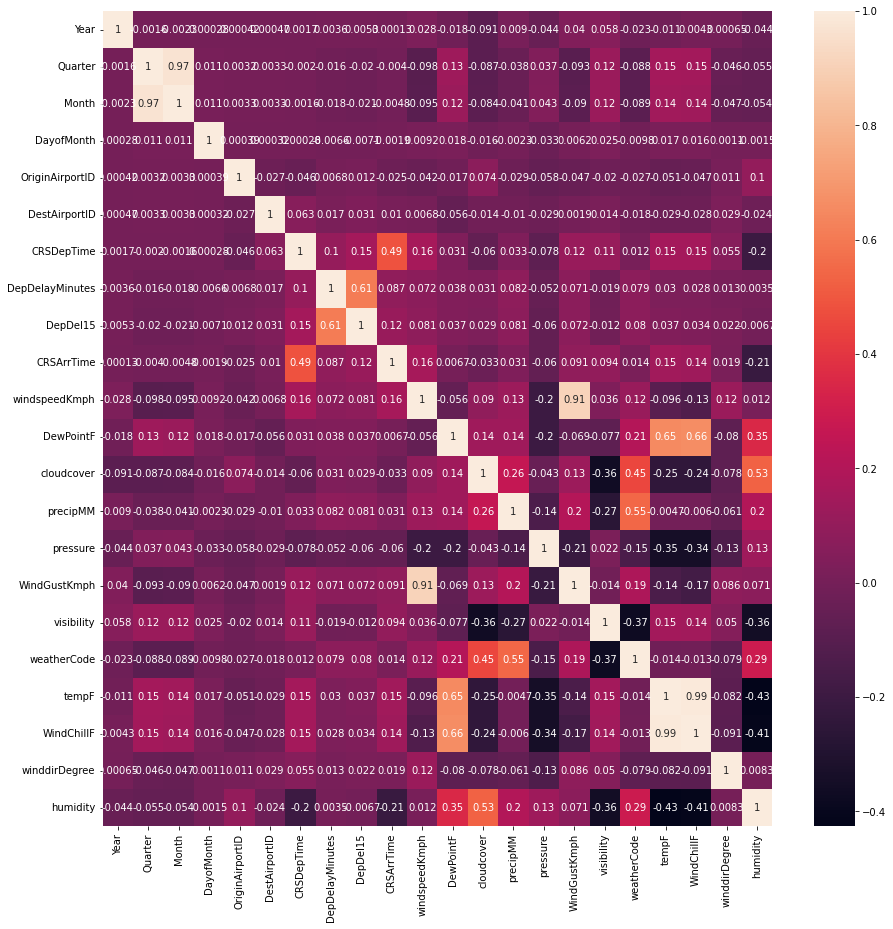

In [11]:
plt.figure(figsize=(15,15))
sns.heatmap(cor,annot=True)

In [12]:
#month and quarter are positivly correlated
#windspeedkmph and windGustKmph are positivly correlated
#WindChillF and tempF are positivly correlated
df1 = df1.drop(['Quarter','WindGustKmph','WindChillF','DepDelayMinutes'],axis=1)

In [13]:
df1

,Year,Month,DayofMonth,OriginAirportID,DestAirportID,CRSDepTime,DepDel15,CRSArrTime,windspeedKmph,DewPointF,cloudcover,precipMM,pressure,visibility,weatherCode,tempF,winddirDegree,humidity
0,2017,9,25,12478,13204,1346,0.0,1642,12,67,39,0.0,1017,10,116,76,117,74
1,2017,9,25,12478,13930,902,0.0,1045,6,66,55,0.0,1018,10,116,70,145,90
2,2017,9,25,13930,12478,2044,0.0,2359,10,63,5,0.0,1013,10,113,85,151,48
3,2017,9,25,11057,12478,1952,0.0,2157,11,64,32,0.0,1013,10,116,80,41,59
4,2017,9,25,12478,11057,1658,0.0,1914,14,66,47,0.0,1017,10,143,72,134,82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1877291,2016,1,3,13204,13930,1130,0.0,1330,16,56,100,1.9,1017,6,302,61,331,87
1877292,2016,1,3,14107,11292,2110,1.0,2259,17,38,99,0.0,1013,10,122,62,76,42
1877293,2016,1,3,11292,14107,1830,1.0,2024,4,26,100,0.0,1029,0,260,26,158,100
1877294,2016,1,3,13930,13204,925,1.0,1312,19,21,100,0.0,1022,10,122,24,333,89


In [14]:
X = df1.drop('DepDel15',axis=1)
y = df1['DepDel15']

In [15]:
X

,Year,Month,DayofMonth,OriginAirportID,DestAirportID,CRSDepTime,CRSArrTime,windspeedKmph,DewPointF,cloudcover,precipMM,pressure,visibility,weatherCode,tempF,winddirDegree,humidity
0,2017,9,25,12478,13204,1346,1642,12,67,39,0.0,1017,10,116,76,117,74
1,2017,9,25,12478,13930,902,1045,6,66,55,0.0,1018,10,116,70,145,90
2,2017,9,25,13930,12478,2044,2359,10,63,5,0.0,1013,10,113,85,151,48
3,2017,9,25,11057,12478,1952,2157,11,64,32,0.0,1013,10,116,80,41,59
4,2017,9,25,12478,11057,1658,1914,14,66,47,0.0,1017,10,143,72,134,82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1877291,2016,1,3,13204,13930,1130,1330,16,56,100,1.9,1017,6,302,61,331,87
1877292,2016,1,3,14107,11292,2110,2259,17,38,99,0.0,1013,10,122,62,76,42
1877293,2016,1,3,11292,14107,1830,2024,4,26,100,0.0,1029,0,260,26,158,100
1877294,2016,1,3,13930,13204,925,1312,19,21,100,0.0,1022,10,122,24,333,89


# FIXING CLASS IMBALANCE

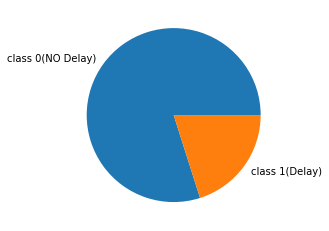

In [16]:
pie_bs = np.array(y.value_counts().tolist())
mylabels = ["class 0(NO Delay)", "class 1(Delay)"]
plt.pie(pie_bs,labels=mylabels)
plt.show() 

# oversampling using SMOTE

In [17]:
sm = SMOTE(random_state=10)
X , y = sm.fit_resample(X , y)

In [18]:
#after smote
y.value_counts()

0.0    1479357
1.0    1479357
Name: DepDel15, dtype: int64

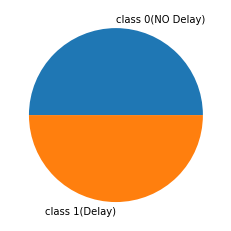

In [19]:
pie_bs = np.array(y.value_counts().tolist())
mylabels = ["class 0(NO Delay)", "class 1(Delay)"]
plt.pie(pie_bs,labels=mylabels)
plt.show() 

In [20]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,stratify=y)

# Logistic Regression with smote

In [19]:
model_LR = LogisticRegression(solver='lbfgs', max_iter=3000)
model_LR.fit(X_train,y_train)

LogisticRegression(max_iter=3000)

In [20]:
res = model_LR.predict(X_test)
model_LR.score(X_test,y_test)

0.6028951757773222

In [21]:
print(classification_report(y_test,res))

              precision    recall  f1-score   support

         0.0       0.60      0.60      0.60    295872
         1.0       0.60      0.61      0.61    295871

    accuracy                           0.60    591743
   macro avg       0.60      0.60      0.60    591743
weighted avg       0.60      0.60      0.60    591743



# DecisionTreeClassifier with smote

In [22]:
model_DTC = DecisionTreeClassifier()
model_DTC.fit(X_train,y_train)

DecisionTreeClassifier()

In [23]:
res = model_DTC.predict(X_test)
model_DTC.score(X_test,y_test)

0.7982215252229431

In [24]:
print(classification_report(y_test,res))

              precision    recall  f1-score   support

         0.0       0.80      0.79      0.80    295872
         1.0       0.80      0.80      0.80    295871

    accuracy                           0.80    591743
   macro avg       0.80      0.80      0.80    591743
weighted avg       0.80      0.80      0.80    591743



# RandomForestClassifier with smote

In [86]:
model_RFC = RandomForestClassifier()
model_RFC.fit(X_train,y_train)

RandomForestClassifier()

In [87]:
res = model_RFC.predict(X_test)
model_RFC.score(X_test,y_test)

0.8593173049786816

In [88]:
print(classification_report(y_test,res))

              precision    recall  f1-score   support

         0.0       0.84      0.89      0.86    295871
         1.0       0.88      0.83      0.85    295872

    accuracy                           0.86    591743
   macro avg       0.86      0.86      0.86    591743
weighted avg       0.86      0.86      0.86    591743



# XGBOOST with smote

In [28]:
model_XG = XGBClassifier()
model_XG.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [29]:
res = model_XG.predict(X_test)
print(classification_report(y_test,res))

              precision    recall  f1-score   support

         0.0       0.74      0.83      0.79    295872
         1.0       0.81      0.71      0.76    295871

    accuracy                           0.77    591743
   macro avg       0.78      0.77      0.77    591743
weighted avg       0.78      0.77      0.77    591743



In [30]:
model_XG.score(X_test,y_test)

0.7731346209418616

# ExtraTreesClassifier with somte

In [31]:
model_ETC = ExtraTreesClassifier()
model_ETC.fit(X_train,y_train)

ExtraTreesClassifier()

In [32]:
res = model_ETC.predict(X_test)
print(classification_report(y_test,res))

              precision    recall  f1-score   support

         0.0       0.85      0.88      0.86    295872
         1.0       0.87      0.84      0.86    295871

    accuracy                           0.86    591743
   macro avg       0.86      0.86      0.86    591743
weighted avg       0.86      0.86      0.86    591743



In [33]:
model_ETC.score(X_test,y_test)

0.857891010117568

# UNDERSAMPLING

In [16]:
undersample = RandomUnderSampler(sampling_strategy='majority')
X , y = undersample.fit_resample(X, y)


In [17]:
y.value_counts()

0.0    372079
1.0    372079
Name: DepDel15, dtype: int64

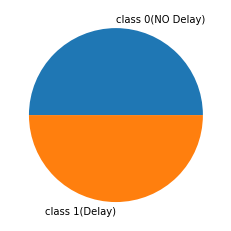

In [18]:
pie_bs = np.array(y.value_counts().tolist())
mylabels = ["class 0(NO Delay)", "class 1(Delay)"]
plt.pie(pie_bs,labels=mylabels)
plt.show() 

In [164]:
y

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
          ... 
2958709    1.0
2958710    1.0
2958711    1.0
2958712    1.0
2958713    1.0
Name: DepDel15, Length: 2958714, dtype: float64

In [19]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,stratify=y)

# RandomForestClassifier with undersampling

In [20]:
model_RFC = RandomForestClassifier()
model_RFC.fit(X_train,y_train)

RandomForestClassifier()

In [21]:
res = model_RFC.predict(X_test)
print(classification_report(y_test,res))

              precision    recall  f1-score   support

         0.0       0.64      0.66      0.65     74416
         1.0       0.65      0.62      0.63     74416

    accuracy                           0.64    148832
   macro avg       0.64      0.64      0.64    148832
weighted avg       0.64      0.64      0.64    148832



In [22]:
model_RFC.score(X_test,y_test)

0.64104493657278

# Logistic regression with undersampling

In [23]:
model_LR = LogisticRegression(solver='lbfgs', max_iter=3000)
model_LR.fit(X_train,y_train)

LogisticRegression(max_iter=3000)

In [24]:
res = model_LR.predict(X_test)
model_LR.score(X_test,y_test)

0.5956514728015481

In [25]:
print(classification_report(y_test,res))

              precision    recall  f1-score   support

         0.0       0.60      0.58      0.59     74416
         1.0       0.59      0.61      0.60     74416

    accuracy                           0.60    148832
   macro avg       0.60      0.60      0.60    148832
weighted avg       0.60      0.60      0.60    148832



# DecisionTreeClassifier with undersampling

In [26]:
model_DTC = DecisionTreeClassifier()
model_DTC.fit(X_train,y_train)

DecisionTreeClassifier()

In [27]:
res = model_DTC.predict(X_test)
model_DTC.score(X_test,y_test)

0.5879112018920662

In [28]:
print(classification_report(y_test,res))

              precision    recall  f1-score   support

         0.0       0.59      0.59      0.59     74416
         1.0       0.59      0.59      0.59     74416

    accuracy                           0.59    148832
   macro avg       0.59      0.59      0.59    148832
weighted avg       0.59      0.59      0.59    148832



# XGBOOST with undersampling

In [29]:
model_XG = XGBClassifier(n_estimators=150)
model_XG.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=150, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [30]:
res = model_XG.predict(X_test)
print(classification_report(y_test,res))

              precision    recall  f1-score   support

         0.0       0.66      0.66      0.66     74416
         1.0       0.66      0.66      0.66     74416

    accuracy                           0.66    148832
   macro avg       0.66      0.66      0.66    148832
weighted avg       0.66      0.66      0.66    148832



In [31]:
model_XG.score(X_test,y_test)

0.6582791335196732

# ExtraTreesClassifier with undersampling

In [32]:
model_ETC = ExtraTreesClassifier()
model_ETC.fit(X_train,y_train)

ExtraTreesClassifier()

In [33]:
res = model_ETC.predict(X_test)
print(classification_report(y_test,res))

              precision    recall  f1-score   support

         0.0       0.62      0.65      0.64     74416
         1.0       0.63      0.61      0.62     74416

    accuracy                           0.63    148832
   macro avg       0.63      0.63      0.63    148832
weighted avg       0.63      0.63      0.63    148832



In [34]:
model_ETC.score(X_test,y_test)

0.627627123199312

# Best model - RandomForest with SMOTE

In [27]:
df2 = pd.read_csv('./Weather dataset/final_merged.csv')
df2 = df2.drop(['Unnamed: 0'] , axis=1)
df2=df2.dropna()
df2

,Year,Quarter,Month,DayofMonth,FlightDate,OriginAirportID,Origin,DestAirportID,Dest,CRSDepTime,...,pressure,WindGustKmph,visibility,weatherCode,tempF,WindChillF,winddirDegree,humidity,date,airport
0,2017,3,9,25,2017-09-25,12478,JFK,13204,MCO,1346,...,1017,14,10,116,76,76,117,74,2017-09-25,JFK
1,2017,3,9,25,2017-09-25,12478,JFK,13930,ORD,902,...,1018,8,10,116,70,70,145,90,2017-09-25,JFK
2,2017,3,9,25,2017-09-25,13930,ORD,12478,JFK,2044,...,1013,12,10,113,85,85,151,48,2017-09-25,ORD
3,2017,3,9,25,2017-09-25,11057,CLT,12478,JFK,1952,...,1013,18,10,116,80,80,41,59,2017-09-25,CLT
4,2017,3,9,25,2017-09-25,12478,JFK,11057,CLT,1658,...,1017,17,10,143,72,72,134,82,2017-09-25,JFK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1877291,2016,1,1,3,2016-01-03,13204,MCO,13930,ORD,1130,...,1017,20,6,302,61,60,331,87,2016-01-03,MCO
1877292,2016,1,1,3,2016-01-03,14107,PHX,11292,DEN,2110,...,1013,27,10,122,62,62,76,42,2016-01-03,PHX
1877293,2016,1,1,3,2016-01-03,11292,DEN,14107,PHX,1830,...,1029,8,0,260,26,24,158,100,2016-01-03,DEN
1877294,2016,1,1,3,2016-01-03,13930,ORD,13204,MCO,925,...,1022,28,10,122,24,12,333,89,2016-01-03,ORD


In [28]:
df2 = df2.drop(['FlightDate','Origin','Dest','time','date','airport','ArrTime','ArrDel15','ArrDelayMinutes',
       'DepTime'],axis=1)

In [29]:
df2 = df2.drop(['Quarter','WindGustKmph','WindChillF','DepDelayMinutes'],axis=1)

In [30]:
X_c = df2.drop('DepDel15',axis=1)
y_c = df2['DepDel15']

In [25]:
model_RFC = RandomForestClassifier()
model_RFC.fit(X_train,y_train)

KeyboardInterrupt: 

In [31]:
with open('RFCWS.sav','rb') as f:
    model_RFC = pickle.load(f)

In [32]:
res = model_RFC.predict(X_c)
print(classification_report(y_c,res))

              precision    recall  f1-score   support

         0.0       0.97      0.98      0.97   1479357
         1.0       0.91      0.88      0.89    372079

    accuracy                           0.96   1851436
   macro avg       0.94      0.93      0.93   1851436
weighted avg       0.96      0.96      0.96   1851436



In [33]:
X_c['dep_class'] = res

In [34]:
df3 = X_c[X_c['dep_class']==1]

In [35]:
df3

,Year,Month,DayofMonth,OriginAirportID,DestAirportID,CRSDepTime,CRSArrTime,windspeedKmph,DewPointF,cloudcover,precipMM,pressure,visibility,weatherCode,tempF,winddirDegree,humidity,dep_class
5,2017,9,25,12478,12892,1945,2312,9,65,51,0.0,1017,10,113,68,138,90,1.0
8,2017,9,25,13204,12478,1954,2236,11,71,31,0.0,1010,10,116,85,113,63,1.0
10,2017,9,25,12889,12478,2359,757,10,23,0,0.0,1014,10,113,57,328,26,1.0
11,2017,9,25,12478,12892,2143,59,6,66,44,0.0,1017,10,113,68,127,91,1.0
32,2017,9,26,11292,12478,2359,549,11,40,0,0.0,1018,10,113,43,118,90,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1877289,2016,1,3,13303,10397,1925,2132,9,71,69,0.0,1012,10,176,79,211,77,1.0
1877290,2016,1,3,13930,12889,2150,2359,16,22,39,0.0,1027,10,113,24,308,90,1.0
1877292,2016,1,3,14107,11292,2110,2259,17,38,99,0.0,1013,10,122,62,76,42,1.0
1877293,2016,1,3,11292,14107,1830,2024,4,26,100,0.0,1029,0,260,26,158,100,1.0


In [36]:
df4 = pd.read_csv('./Weather dataset/final_merged.csv')
df4 = df4.drop(['Unnamed: 0'] , axis=1)
df4=df4.dropna()
df4 = df4.drop(['FlightDate','Origin','Dest','time','date','airport',
       'DepTime'],axis=1)
df4 = df4.drop(['Quarter','WindGustKmph','WindChillF'],axis=1)
df4

,Year,Month,DayofMonth,OriginAirportID,DestAirportID,CRSDepTime,DepDelayMinutes,DepDel15,CRSArrTime,ArrTime,...,windspeedKmph,DewPointF,cloudcover,precipMM,pressure,visibility,weatherCode,tempF,winddirDegree,humidity
0,2017,9,25,12478,13204,1346,0.0,0.0,1642,1615.0,...,12,67,39,0.0,1017,10,116,76,117,74
1,2017,9,25,12478,13930,902,0.0,0.0,1045,1008.0,...,6,66,55,0.0,1018,10,116,70,145,90
2,2017,9,25,13930,12478,2044,1.0,0.0,2359,2345.0,...,10,63,5,0.0,1013,10,113,85,151,48
3,2017,9,25,11057,12478,1952,0.0,0.0,2157,2127.0,...,11,64,32,0.0,1013,10,116,80,41,59
4,2017,9,25,12478,11057,1658,0.0,0.0,1914,1849.0,...,14,66,47,0.0,1017,10,143,72,134,82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1877291,2016,1,3,13204,13930,1130,0.0,0.0,1330,1317.0,...,16,56,100,1.9,1017,6,302,61,331,87
1877292,2016,1,3,14107,11292,2110,42.0,1.0,2259,2338.0,...,17,38,99,0.0,1013,10,122,62,76,42
1877293,2016,1,3,11292,14107,1830,58.0,1.0,2024,2117.0,...,4,26,100,0.0,1029,0,260,26,158,100
1877294,2016,1,3,13930,13204,925,74.0,1.0,1312,1419.0,...,19,21,100,0.0,1022,10,122,24,333,89


In [37]:
df5 = pd.merge(df3,df4 , how='left')
df5

,Year,Month,DayofMonth,OriginAirportID,DestAirportID,CRSDepTime,CRSArrTime,windspeedKmph,DewPointF,cloudcover,...,weatherCode,tempF,winddirDegree,humidity,dep_class,DepDelayMinutes,DepDel15,ArrTime,ArrDelayMinutes,ArrDel15
0,2017,9,25,12478,12892,1945,2312,9,65,51,...,113,68,138,90,1.0,104.0,1.0,28.0,76.0,1.0
1,2017,9,25,13204,12478,1954,2236,11,71,31,...,116,85,113,63,1.0,20.0,1.0,2238.0,2.0,0.0
2,2017,9,25,12889,12478,2359,757,10,23,0,...,113,57,328,26,1.0,25.0,1.0,809.0,12.0,0.0
3,2017,9,25,12478,12892,2143,59,6,66,44,...,113,68,127,91,1.0,98.0,1.0,213.0,74.0,1.0
4,2017,9,26,11292,12478,2359,549,11,40,0,...,113,43,118,90,1.0,17.0,1.0,534.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361093,2016,1,3,13303,10397,1925,2132,9,71,69,...,176,79,211,77,1.0,26.0,1.0,2202.0,30.0,1.0
361094,2016,1,3,13930,12889,2150,2359,16,22,39,...,113,24,308,90,1.0,21.0,1.0,16.0,17.0,1.0
361095,2016,1,3,14107,11292,2110,2259,17,38,99,...,122,62,76,42,1.0,42.0,1.0,2338.0,39.0,1.0
361096,2016,1,3,11292,14107,1830,2024,4,26,100,...,260,26,158,100,1.0,58.0,1.0,2117.0,53.0,1.0


In [38]:
X_r = df5.drop(['DepDelayMinutes','DepDel15','dep_class','ArrDelayMinutes'],axis=1)
y_r = df5['DepDelayMinutes']

In [39]:
X_train , X_test , y_train , y_test = train_test_split(X_r,y_r,test_size=0.2,random_state=10)

# Linear regression

In [58]:
model_LR = LinearRegression()
model_LR.fit(X_train,y_train)

LinearRegression()

In [59]:
res = model_LR.predict(X_test)

In [60]:
print("MAE",mean_absolute_error(y_test,res))
print("R2",r2_score(y_test,res))
print(f"The accuracy of our model is {round(r2_score(y_test,res), 2) *100}")
print(f"MSE {mean_squared_error(y_test,res)}")
model_LR.score(X_test,y_test)

MAE 36.940970774564235
R2 0.1583311039754126
The accuracy of our model is 16.0
MSE 4375.457319128642


0.1583311039754126

# XGBOOST Regressor 

In [88]:
model_XGR = xg.XGBRegressor(n_estimators = 200, seed = 10)
model_XGR.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=200, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [89]:
res = model_XGR.predict(X_test)

In [91]:

print("MAE",mean_absolute_error(y_test,res))
print("R2",r2_score(y_test,res))
print(f"MSE {mean_squared_error(y_test,res)}")
print("The accuracy of our model is {}%".format(round(r2_score(y_test,res), 2) *100))

MAE 11.738766387309251
R2 0.9238947819461806
MSE 395.63673426722147
The accuracy of our model is 92.0%


In [92]:
model_XGR.score(X_test,y_test)

0.9238947819461806

# ExtraTree regressor

In [41]:
# n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=3
model_ETR = ExtraTreesRegressor()
model_ETR.fit(X_train,y_train)

ExtraTreesRegressor()

In [42]:
res = model_ETR.predict(X_test)

In [43]:
print("MAE",mean_absolute_error(y_test,res))
print("R2",r2_score(y_test,res))
print(f"MSE {mean_squared_error(y_test,res)}")
print("The accuracy of our model is {}%".format(round(r2_score(y_test,res), 2) *100))

MAE 12.230169135973414
R2 0.9277696869304775
MSE 375.4928493564802
The accuracy of our model is 93.0%


In [44]:
model_ETR.score(X_test,y_test)

0.9277696869304775

# RandomForestRegressor

In [175]:
model_ETR = RandomForestRegressor(random_state=1, n_estimators=10)
model_ETR.fit(X_train,y_train)

RandomForestRegressor(n_estimators=10, random_state=1)

In [176]:
res = model_ETR.predict(X_test)

In [177]:
print("MAE",mean_absolute_error(y_test,res))
print("R2",r2_score(y_test,res))
print(f"MSE {mean_squared_error(y_test,res)}")
print("The accuracy of our model is {}%".format(round(r2_score(y_test,res), 2) *100))

MAE 12.66826686974984
R2 0.9200811803116478
MSE 415.46193068694294
The accuracy of our model is 92.0%


In [178]:
model_ETR.score(X_test,y_test)

0.9200811803116478

# Predicting using best model for full dataset

In [45]:
pred_delay = model_ETR.predict(X_r)
df_ra =X_r
df_ra['predicted_delay'] = pred_delay

In [46]:
print("MAE",mean_absolute_error(pred_delay,y_r))
print("R2",r2_score(pred_delay,y_r))
print(f"MSE {mean_squared_error(pred_delay,y_r)}")
print(f"MSE {mean_squared_error(pred_delay,y_r)}")
print("The accuracy of our model is {}%".format(round(r2_score(pred_delay,y_r), 2) *100))

MAE 2.4462107654985634
R2 0.985506980624233
MSE 75.10077342030418
MSE 75.10077342030418
The accuracy of our model is 99.0%


In [47]:
df_ra

,Year,Month,DayofMonth,OriginAirportID,DestAirportID,CRSDepTime,CRSArrTime,windspeedKmph,DewPointF,cloudcover,precipMM,pressure,visibility,weatherCode,tempF,winddirDegree,humidity,ArrTime,ArrDel15,predicted_delay
0,2017,9,25,12478,12892,1945,2312,9,65,51,0.0,1017,10,113,68,138,90,28.0,1.0,104.0
1,2017,9,25,13204,12478,1954,2236,11,71,31,0.0,1010,10,116,85,113,63,2238.0,0.0,20.0
2,2017,9,25,12889,12478,2359,757,10,23,0,0.0,1014,10,113,57,328,26,809.0,0.0,25.0
3,2017,9,25,12478,12892,2143,59,6,66,44,0.0,1017,10,113,68,127,91,213.0,1.0,98.0
4,2017,9,26,11292,12478,2359,549,11,40,0,0.0,1018,10,113,43,118,90,534.0,0.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361093,2016,1,3,13303,10397,1925,2132,9,71,69,0.0,1012,10,176,79,211,77,2202.0,1.0,26.0
361094,2016,1,3,13930,12889,2150,2359,16,22,39,0.0,1027,10,113,24,308,90,16.0,1.0,21.0
361095,2016,1,3,14107,11292,2110,2259,17,38,99,0.0,1013,10,122,62,76,42,2338.0,1.0,42.0
361096,2016,1,3,11292,14107,1830,2024,4,26,100,0.0,1029,0,260,26,158,100,2117.0,1.0,58.0


# Regression analysis

In [48]:
df_ra['predicted_delay'].max()

2149.0

In [49]:
df_ra['predicted_delay'].min()

0.0

In [50]:
df_ra['depDelay'] = y_r

In [51]:
final_dist = []

In [52]:
batch = df_ra[(df_ra['predicted_delay'] >= 15) & (df_ra['predicted_delay'] <= 100)] 
actual = batch['depDelay']
batch = batch.drop(['depDelay'],axis=1)
X_ra = batch.drop(['predicted_delay'],axis=1)
y_ra = batch['predicted_delay']
res = model_ETR.predict(X_ra)
print('----------------------------------------------------------------------')
print("MAE",mean_absolute_error(actual,res))
print("R2",r2_score(actual,res))
print(f"MSE {mean_squared_error(actual,res)}")
print('----------------------------------------------------------------------')
print()
final_dist.extend(res)

----------------------------------------------------------------------
MAE 2.1943557917439125
R2 0.8982050938822558
MSE 57.15459628095663
----------------------------------------------------------------------



In [53]:
batch.shape

(270782, 20)

In [54]:
batch = df_ra[(df_ra['predicted_delay'] >= 100) & (df_ra['predicted_delay'] <= 200)] 
actual = batch['depDelay']
batch = batch.drop(['depDelay'],axis=1)
X_ra = batch.drop(['predicted_delay'],axis=1)
y_ra = batch['predicted_delay']
res = model_ETR.predict(X_ra)
print('----------------------------------------------------------------------')
print("MAE",mean_absolute_error(actual,res))
print("R2",r2_score(actual,res))
print(f"MSE {mean_squared_error(actual,res)}")
print('----------------------------------------------------------------------')
print()
final_dist.extend(res)

----------------------------------------------------------------------
MAE 3.5667465222322523
R2 0.8198872648343369
MSE 162.62793144689024
----------------------------------------------------------------------



In [55]:
batch.shape

(43203, 20)

In [56]:
batch = df_ra[(df_ra['predicted_delay'] >= 200) & (df_ra['predicted_delay'] <= 500)] 
actual = batch['depDelay']
batch = batch.drop(['depDelay'],axis=1)
X_ra = batch.drop(['predicted_delay'],axis=1)
y_ra = batch['predicted_delay']
res = model_ETR.predict(X_ra)
print('----------------------------------------------------------------------')
print("MAE",mean_absolute_error(actual,res))
print("R2",r2_score(actual,res))
print(f"MSE {mean_squared_error(actual,res)}")
print('----------------------------------------------------------------------')
print()
final_dist.extend(res)

----------------------------------------------------------------------
MAE 4.178472429796272
R2 0.9583937926940839
MSE 190.14273442932432
----------------------------------------------------------------------



In [57]:
batch.shape

(12713, 20)

In [58]:
batch = df_ra[(df_ra['predicted_delay'] >= 500) & (df_ra['predicted_delay'] <= 1000)] 
actual = batch['depDelay']
batch = batch.drop(['depDelay'],axis=1)
X_ra = batch.drop(['predicted_delay'],axis=1)
y_ra = batch['predicted_delay']
res = model_ETR.predict(X_ra)
print('----------------------------------------------------------------------')
print("MAE",mean_absolute_error(actual,res))
print("R2",r2_score(actual,res))
print(f"MSE {mean_squared_error(actual,res)}")
print('----------------------------------------------------------------------')
print()
final_dist.extend(res)

----------------------------------------------------------------------
MAE 6.554764649375601
R2 0.9499008316888632
MSE 1077.5283267050913
----------------------------------------------------------------------



In [59]:
batch.shape

(1041, 20)

In [60]:
batch = df_ra[(df_ra['predicted_delay'] >= 1000)& (df_ra['predicted_delay'] <= 2000)] 
actual = batch['depDelay']
batch = batch.drop(['depDelay'],axis=1)
X_ra = batch.drop(['predicted_delay'],axis=1)
y_ra = batch['predicted_delay']
res = model_ETR.predict(X_ra)
print('----------------------------------------------------------------------')
print("MAE",mean_absolute_error(actual,res))
print("R2",r2_score(actual,res))
print(f"MSE {mean_squared_error(actual,res)}")
print('----------------------------------------------------------------------')
print()
final_dist.extend(res)

----------------------------------------------------------------------
MAE 6.810616438356165
R2 0.9771189559902609
MSE 591.1023527397264
----------------------------------------------------------------------



In [61]:
batch.shape

(146, 20)

In [62]:
batch = df_ra[(df_ra['predicted_delay'] >= 2000)]
actual = batch['depDelay']
batch = batch.drop(['depDelay'],axis=1)
X_ra = batch.drop(['predicted_delay'],axis=1)
y_ra = batch['predicted_delay']
res = model_ETR.predict(X_ra)
print('----------------------------------------------------------------------')
print("MAE",mean_absolute_error(actual,res))
print("R2",r2_score(actual,res))
print(f"MSE {mean_squared_error(actual,res)}")
print('----------------------------------------------------------------------')
print()
final_dist.extend(res)

----------------------------------------------------------------------
MAE 0.0
R2 1.0
MSE 0.0
----------------------------------------------------------------------



In [63]:
batch.shape

(2, 20)

In [64]:
ranges = {"15-100":270764,"100-200":43231,"200-500":12711,"500-1000":1042,"1000-2000":144,"2000+":2}

In [65]:
x = list(ranges.values())
y = list(ranges.keys())

In [66]:
len(final_dist)

327887

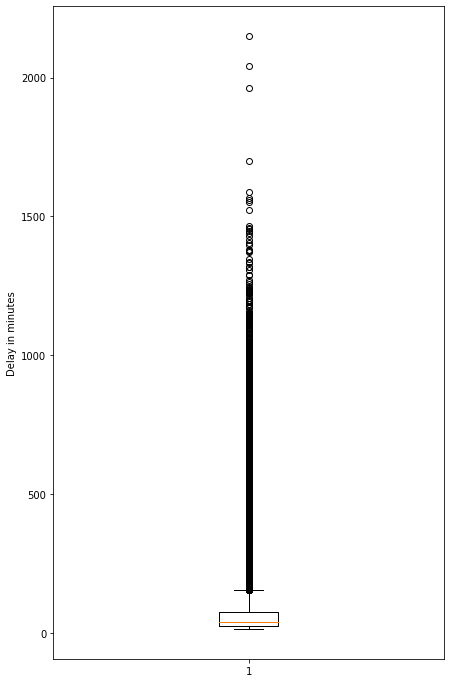

In [67]:
plt.figure(figsize=(7,12))
plt.boxplot(final_dist,)
plt.ylabel('Delay in minutes')
plt.show()